# importing libraries

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Scaling
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve , confusion_matrix

# Cross Validation
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# understanding data


In [2]:
#reading data
df = pd.read_csv("/content/drive/MyDrive/zomato.csv")

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.describe(include=['O'])

,url,address,name,online_order,book_table,rate,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717,51717,51717,51717,51717,43942,50509,51696,51490,23639,51672,51371,51717,51717,51717,51717
unique,51717,11495,8792,2,2,64,14926,93,93,5271,2723,70,22513,9098,7,30
top,https://www.zomato.com/bangalore/jalsa-banasha...,Delivery Only,Cafe Coffee Day,Yes,No,NEW,080 43334321,BTM,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM
freq,1,128,96,30444,45268,2208,216,5124,19132,182,2913,7576,7595,39617,25942,3279


In [5]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
df.shape

(51717, 17)

In [7]:
#getting unique values for each feature

dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
url,51717
address,11495
name,8792
online_order,2
book_table,2
rate,64
votes,2328
phone,14926
location,93
rest_type,93


In [8]:
# cheching if there any nulls
df.isnull().any()

url                            False
address                        False
name                           False
online_order                   False
book_table                     False
rate                            True
votes                          False
phone                           True
location                        True
rest_type                       True
dish_liked                      True
cuisines                        True
approx_cost(for two people)     True
reviews_list                   False
menu_item                      False
listed_in(type)                False
listed_in(city)                False
dtype: bool

# data preparation

In [9]:
df.rate = df.rate.str[0:3] #taking first 3 digits
df.rate = df.rate.replace("NEW", np.nan) #remove "NEW"
df.rate = df.rate.replace("-", np.nan) #remove "-"
df.rate = df.rate.astype(float) #convert rates from string into float
df.rate

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

In [10]:
#rename
df = df.rename(columns = {"listed_in(city)" : "city"})
df = df.rename(columns = {"listed_in(type)" : "type"})

In [11]:
#rename approx_cost(for two people) and make it float
df = df.rename(columns = {"approx_cost(for two people)" : "cost"})
df['cost'] = df['cost'].astype(str)
df['cost'] = df['cost'].apply(lambda x: x.replace(',','.'))
df['cost'] = df['cost'].astype(float)

In [12]:
#removing all unneeded features
df.drop("dish_liked" , axis =1 ,inplace=True)
df.drop("phone" , axis =1 , inplace=True)
df.drop("url" , axis =1 , inplace=True)
df.drop("address" , axis =1 , inplace=True)
df.drop("name" , axis =1 , inplace=True)
df.drop("reviews_list" , axis =1 , inplace=True)
df.drop("menu_item" , axis =1 , inplace=True)

In [13]:
#defining categorical data and continues data
cat_cols = [col for col, dtype in df.dtypes.items() if dtype == 'object']
con_cols = [col for col, dtype in df.dtypes.items() if dtype != 'object']

In [14]:
cat_cols

['online_order',
 'book_table',
 'location',
 'rest_type',
 'cuisines',
 'type',
 'city']

In [15]:
con_cols

['rate', 'votes', 'cost']

In [16]:
#adding target column (output)
target = []
for i in (df.rate):
  if (i >= 3.75) :
    target.append(1)
  else :
    target.append(0)

target = pd.DataFrame(target, columns=['target'])
df=pd.concat([df,target],axis=1)

In [17]:
df

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type,city,target
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,1
1,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari,1
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,1
3,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari,0
4,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari,1
...,...,...,...,...,...,...,...,...,...,...,...
51712,No,No,3.6,27,Whitefield,Bar,Continental,1.5,Pubs and bars,Whitefield,0
51713,No,No,NaN,0,Whitefield,Bar,Finger Food,600.0,Pubs and bars,Whitefield,0
51714,No,No,NaN,0,Whitefield,Bar,Finger Food,2.0,Pubs and bars,Whitefield,0
51715,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2.5,Pubs and bars,Whitefield,1


# EDA

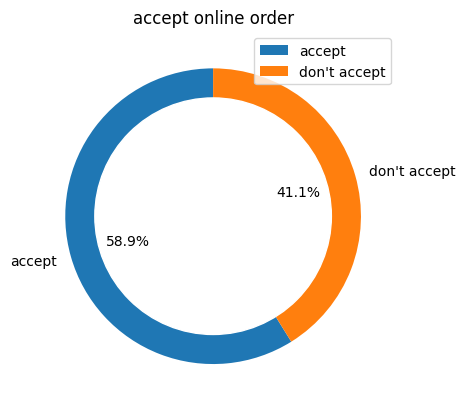

In [18]:
# getting online orders count and its percentage
counts = df["online_order"].value_counts()
percs = df["online_order"].value_counts(normalize=True)

orders = pd.concat([counts,percs], axis=1, keys=['count', 'percentage'] )
labels = ["accept","don't accept"]

#plotting orders
plt.pie(orders['percentage'] , labels = labels , autopct='%1.1f%%' , startangle=90)
plt.title("accept online order")
plt.legend()
circle = plt.Circle((0,0), 0.8, color='white')
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

<Axes: xlabel='online_order', ylabel='count'>

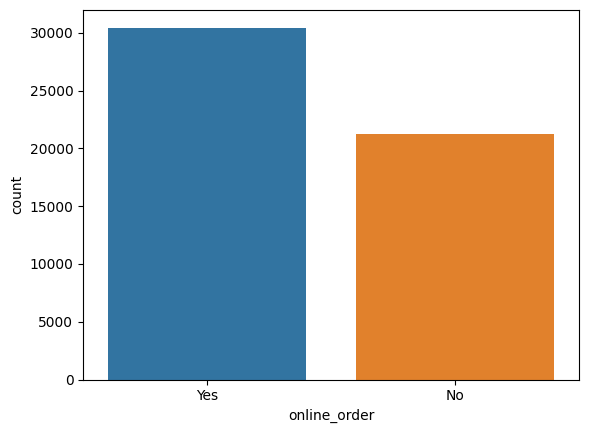

In [19]:
#plotting count of resturant that has online order
sns.countplot(x=df.online_order , data=df)

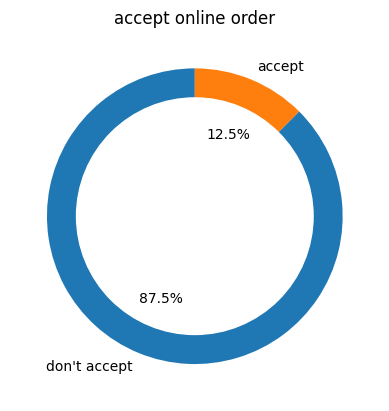

In [20]:
counts = df["book_table"].value_counts()
percs = df["book_table"].value_counts(normalize=True)

orders = pd.concat([counts,percs], axis=1, keys=['count', 'percentage'] )
labels = ["don't accept","accept"]


plt.pie(orders['percentage'] , labels = labels , autopct='%1.1f%%' , startangle=90)
plt.title("accept online order")
circle = plt.Circle((0,0), 0.8, color='white')
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

<Axes: xlabel='book_table', ylabel='count'>

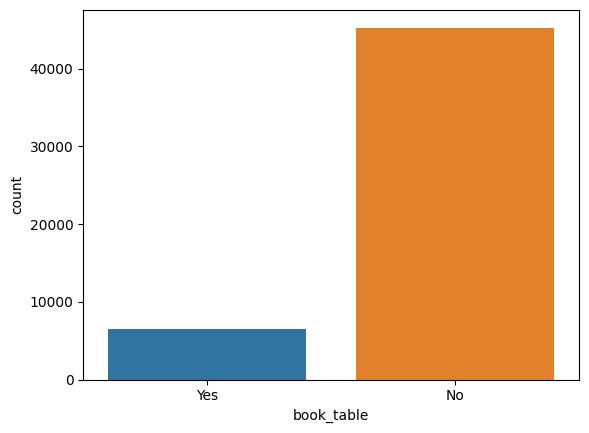

In [21]:
sns.countplot(x=df.book_table , data=df )

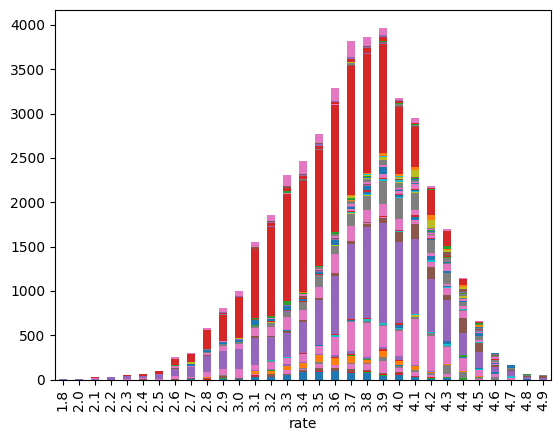

In [22]:
loc_plt=pd.crosstab(df['rate'],df['rest_type'])
loc_plt.plot(kind='bar',stacked=True);
plt.legend().remove()

In [29]:
outlets = df['name'].value_counts().sort_values(ascending = False)[:20]
sns.barplot(x=outlets,y=outlets.index,palette='Set1')

KeyError: ignored

In [ ]:
g = sns.FacetGrid(df, col='target')
g.map(plt.hist, 'rate', bins=20)

# dealing with missing data

In [24]:
# getting missing data
def missing_data():
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data.head(20))

missing_data()

              Total   Percent
rate          10052  0.194365
cost            346  0.006690
rest_type       227  0.004389
cuisines         45  0.000870
location         21  0.000406
online_order      0  0.000000
book_table        0  0.000000
votes             0  0.000000
type              0  0.000000
city              0  0.000000
target            0  0.000000


In [25]:
#replace nan whith mean of the column
df['rate']=df['rate'].fillna(df.rate.mean())
df["cost"]=df["cost"].fillna(df.cost.mean())

In [26]:
df = df.dropna()

In [27]:
missing_data()

              Total  Percent
online_order      0      0.0
book_table        0      0.0
rate              0      0.0
votes             0      0.0
location          0      0.0
rest_type         0      0.0
cuisines          0      0.0
cost              0      0.0
type              0      0.0
city              0      0.0
target            0      0.0


In [28]:
df['cuisines'] = df['cuisines'].apply(lambda x: len(x.split(',')))

<ipython-input-28-75abdffa7838>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cuisines'] = df['cuisines'].apply(lambda x: len(x.split(',')))


# categorical data Encoding

In [30]:
df = pd.get_dummies(df, columns = cat_cols, drop_first = True)

In [31]:
X=df.drop("target" , axis=1)
y=df.target

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (41172, 231)
The shape of X_test is        (10294, 231)
The shape of y_train is       (41172,)
The shape of y_test is        (10294,)


In [33]:
from sklearn.tree import DecisionTreeRegressor


DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(X_train,y_train)
y_predict=DTree.predict(X_test)

print("The test accuracy score of Logistric Regression is ", accuracy_score(y_predict, y_test))

The test accuracy score of Logistric Regression is  1.0


In [34]:
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=5,random_state=42)
RForest.fit(X_train,y_train)
y_pred=RForest.predict(X_test)
from sklearn import metrics

print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))
print("The test report of Logistric Regression is : \n" , classification_report(y_test, y_pred))
print('the confusion matrix is : \n' , confusion_matrix(y_test,y_pred))

The test accuracy score of Logistric Regression is  1.0
The test report of Logistric Regression is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6181
           1       1.00      1.00      1.00      4113

    accuracy                           1.00     10294
   macro avg       1.00      1.00      1.00     10294
weighted avg       1.00      1.00      1.00     10294

the confusion matrix is : 
 [[6181    0]
 [   0 4113]]


In [35]:
print(y_test[0:20])
print(40*"*")
print(y_pred[0:20])


385      0
43738    1
40125    1
32077    0
4065     0
27035    0
10231    0
29005    1
27231    0
7664     0
30998    0
20709    0
887      1
3785     0
37995    0
21932    1
43828    1
48845    1
17374    1
47039    1
Name: target, dtype: int64
****************************************
[0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1.]


In [36]:
#logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_proba = logreg.predict_proba(X_test)
y_pred = np.argmax(y_pred_proba,axis=1)


#printing the test accuracy
print("The test accuracy score of Logistric Regression is  \n", accuracy_score(y_test, y_pred))
print("The test report of Logistric Regression is : \n" , classification_report(y_test, y_pred))
print('the confusion matrix is : \n' , confusion_matrix(y_test,y_pred))



The test accuracy score of Logistric Regression is  
 0.8877015737322712
The test report of Logistric Regression is : 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      6181
           1       0.89      0.82      0.85      4113

    accuracy                           0.89     10294
   macro avg       0.89      0.88      0.88     10294
weighted avg       0.89      0.89      0.89     10294

the confusion matrix is : 
 [[5765  416]
 [ 740 3373]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

y_predict=gbr.predict(X_test)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("The test report of Logistric Regression is : \n" , classification_report(y_test, y_pred))
print('the confusion matrix is : \n' , confusion_matrix(y_test,y_pred))

Accuracy: 0.8877015737322712
The test report of Logistric Regression is : 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      6181
           1       0.89      0.82      0.85      4113

    accuracy                           0.89     10294
   macro avg       0.89      0.88      0.88     10294
weighted avg       0.89      0.89      0.89     10294

the confusion matrix is : 
 [[5765  416]
 [ 740 3373]]
